In [1]:
%matplotlib inline
#%matplotlib notebook

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import os

from ipywidgets import interactive
from ipywidgets import Dropdown, FloatSlider, IntSlider
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import decode_predictions, preprocess_input
from keras.preprocessing import image
from noise_procedural import normalize, perturb, gabor_ani, gabor_iso

Using TensorFlow backend.


# Model & Images

<b>Model:</b> [InceptionV3](https://keras.io/applications/#inceptionv3) NN architecture using Keras weights from training on the ImageNet dataset. This achieves a top-1 accuracy of 77.9% and top-5 accuracy of 93.7%. Other models can be found [here](https://keras.io/applications/#documentation-for-individual-models). 
<br><b>Images:</b> Stock photos taken from [Pexels](https://www.pexels.com/).

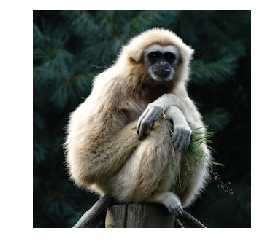

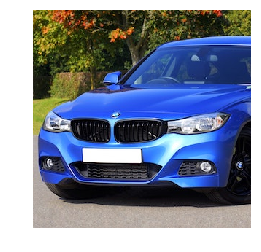

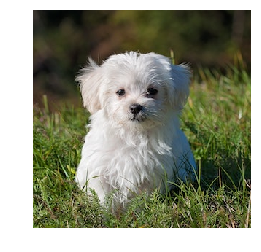

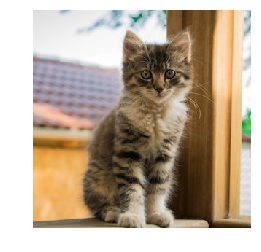

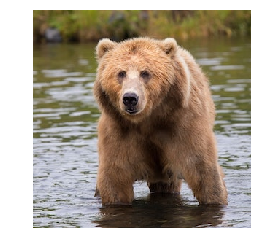

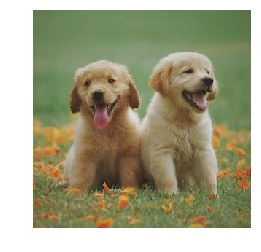

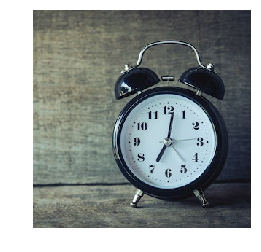

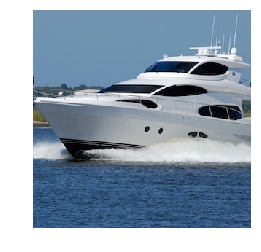

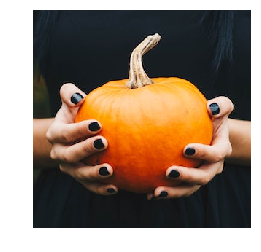

In [3]:
img_dir = 'images/'

# Specify image dimensions
dim_x = 299
dim_y = 299

# Load model
model = InceptionV3(weights = 'imagenet')

# Load images
all_images = {}
for filename in os.listdir(img_dir):
    if not filename.startswith('.'):
        img = image.load_img(img_dir + filename, target_size = (dim_x, dim_y)) # We assume all images have the same dimensions
        img = image.img_to_array(img)
        all_images[filename.split('.')[0]] = img

# Display images
for key, vals in all_images.items():
    fig2 = plt.figure()
    plt.axis('off')
    plt.imshow(vals.astype(np.uint8))

# Anisotropic Gabor Noise

In [4]:
# Interactive slider
def PlotGaborAni(img_key, max_norm, point_num, g_var, freq, angle, freq_sine):
    image = all_images[img_key]
    fig = plt.figure(figsize = (18, 8))
    plt.subplots_adjust(wspace = 0.05)
    plt.title('Anisotropic Gabor Noise', size = 16)
    plt.axis('off')

    # Noise pattern
    ax = fig.add_subplot(1, 3, 1)    
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    ax.tick_params(axis = 'both', which = 'both', length = 0)
    ax.set_title('Noise Pattern', size = 14)
    noise = gabor_ani(dim_x = dim_x, point_num = point_num, g_var = g_var, h_freq = freq, h_omega = angle, freq_sine = freq_sine)
    plt.imshow((noise.reshape(dim_x, dim_y, 3) + 1) / 2, cmap = plt.cm.gray)
    
    # Original image
    ax = fig.add_subplot(1, 3, 2)
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    ax.tick_params(axis = 'both', which = 'both', length = 0)
    ax.set_title('Original Image', size = 14)
    payload = perturb(orig = image, max_norm = max_norm, noise = np.zeros((dim_x, dim_y, 3)))
    plt.imshow(payload.astype(np.uint8))
    prob = model.predict(preprocess_input(payload.astype(np.float).reshape((1, dim_x, dim_y, 3))))
    plt.xlabel('\n'.join((item[1]  + '  %.3f' % item[2]) for item in decode_predictions(prob)[0]), horizontalalignment = 'right', x = 1, size = 16)
    
    # Altered image
    ax = fig.add_subplot(1, 3, 3)
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    ax.tick_params(axis = 'both', which = 'both', length = 0)
    ax.set_title('Altered Image', size = 14)
    payload = perturb(orig = image, max_norm = max_norm, noise = noise)
    plt.imshow(payload.astype(np.uint8))
    prob = model.predict(preprocess_input(payload.astype(np.float).reshape((1, dim_x, dim_y, 3))))
    plt.xlabel('\n'.join((item[1]  + '  %.3f' % item[2]) for item in decode_predictions(prob)[0]), horizontalalignment = 'right', x = 1, size = 16)

# Parameter sliders
s_img_key = Dropdown(options = list(all_images.keys()), description = 'Image:')
s_max_norm = IntSlider(min = 0, max = 64, value = 12, step = 2, continuous_update = False, description = 'Max Change:')
s_point_num = IntSlider(min = 8, max = 128, value = 64, step = 8, continuous_update = False, description = '# Points:')
s_gvar = FloatSlider(min = 0, max = 0.3, value = 0.06, step = 0.01, continuous_update = False, description = 'Variance:')
s_freq = FloatSlider(min = 0, max = 0.2, value = 0.1, step = 0.01, continuous_update = False, description = 'Frequency:')
s_angle = FloatSlider(min = 0, max = np.pi, value = np.pi / 3, step = np.pi / 36, continuous_update = False, description = 'Angle:')
s_freq_sine = IntSlider(min = 0, max = 24, value = 12, step = 1, continuous_update = False, description = 'Freq Sine:')

interactive(PlotGaborAni, img_key = s_img_key,
                 max_norm = s_max_norm,
                 point_num = s_point_num,
                 g_var = s_gvar,
                 freq = s_freq,
                 angle = s_angle,
                 freq_sine = s_freq_sine)

aW50ZXJhY3RpdmUoY2hpbGRyZW49KERyb3Bkb3duKGRlc2NyaXB0aW9uPXUnSW1hZ2U6Jywgb3B0aW9ucz0oJ0dpYmJvbicsICdCbHVlIENhcicsICdNYWx0ZXNlIERvZycsICdDYXQnLCAnQnLigKY=


The classifier's top 5 predictions are displayed under each image.

# Isotropic Gabor Noise

<b>Play</b> with the parameters of the noise function below. You'll find that it's easier to fool the classifier on some images over others!

In [5]:
# Interactive slider
def PlotGaborIso(img_key, max_norm, point_num, g_var, freq, freq_sine):
    image = all_images[img_key]
    fig = plt.figure(figsize = (18, 8))
    plt.subplots_adjust(wspace = 0.05)
    plt.title('Isotropic Gabor Noise', size = 16)
    plt.axis('off')

    # Noise pattern
    ax = fig.add_subplot(1, 3, 1)    
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    ax.tick_params(axis = 'both', which = 'both', length = 0)
    ax.set_title('Noise Pattern', size = 14)
    
    noise = gabor_iso(dim_x = dim_x, point_num = point_num, g_var = g_var, h_freq = freq, freq_sine = freq_sine)
    plt.imshow((noise.reshape(dim_x, dim_y, 3) + 1) / 2, cmap = plt.cm.gray)
    
    # Original image
    ax = fig.add_subplot(1, 3, 2)
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    ax.tick_params(axis = 'both', which = 'both', length = 0)
    ax.set_title('Original Image', size = 14)
    payload = perturb(orig = image, max_norm = max_norm, noise = np.zeros((dim_x, dim_y, 3)))
    plt.imshow(payload.astype(np.uint8))
    prob = model.predict(preprocess_input(payload.astype(np.float).reshape((1, dim_x, dim_y, 3))))
    plt.xlabel('\n'.join((item[1]  + '  %.3f' % item[2]) for item in decode_predictions(prob)[0]), horizontalalignment = 'right', x = 1, size = 16)
    
    # Altered image
    ax = fig.add_subplot(1, 3, 3)
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    ax.tick_params(axis = 'both', which = 'both', length = 0)
    ax.set_title('Altered Image', size = 14)
    payload = perturb(orig = image, max_norm = max_norm, noise = noise)
    plt.imshow(payload.astype(np.uint8))
    prob = model.predict(preprocess_input(payload.astype(np.float).reshape((1, dim_x, dim_y, 3))))
    plt.xlabel('\n'.join((item[1]  + '  %.3f' % item[2]) for item in decode_predictions(prob)[0]), horizontalalignment = 'right', x = 1, size = 16)

# Parameter sliders
s_img_key = Dropdown(options = list(all_images.keys()), description = 'Image:')
s_max_norm = IntSlider(min = 0, max = 64, value = 24, step = 2, continuous_update = False, description = 'Max Change:')
s_point_num = IntSlider(min = 8, max = 128, value = 64, step = 8, continuous_update = False, description = '# Points:')
s_gvar = FloatSlider(min = 0, max = 0.3, value = 0.06, step = 0.01, continuous_update = False, description = 'Variance:')
s_freq = FloatSlider(min = 0, max = 0.2, value = 0.1, step = 0.01, continuous_update = False, description = 'Frequency:')
s_freq_sine = IntSlider(min = 0, max = 24, value = 12, step = 1, continuous_update = False, description = 'Freq Sine:')

interactive(PlotGaborIso, img_key = s_img_key,
                 max_norm = s_max_norm,
                 point_num = s_point_num,
                 g_var = s_gvar,
                 freq = s_freq,
                 freq_sine = s_freq_sine)

aW50ZXJhY3RpdmUoY2hpbGRyZW49KERyb3Bkb3duKGRlc2NyaXB0aW9uPXUnSW1hZ2U6Jywgb3B0aW9ucz0oJ0dpYmJvbicsICdCbHVlIENhcicsICdNYWx0ZXNlIERvZycsICdDYXQnLCAnQnLigKY=


The classifier's top 5 predictions are displayed under each image.